<a href="https://colab.research.google.com/github/tharindatj/HandsOnMachinerLearning/blob/master/housing_chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the liabraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the data

In [8]:
housing = pd.read_csv('housing.csv')

Analysing the data

In [9]:
housing.head()
housing.info()
housing.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


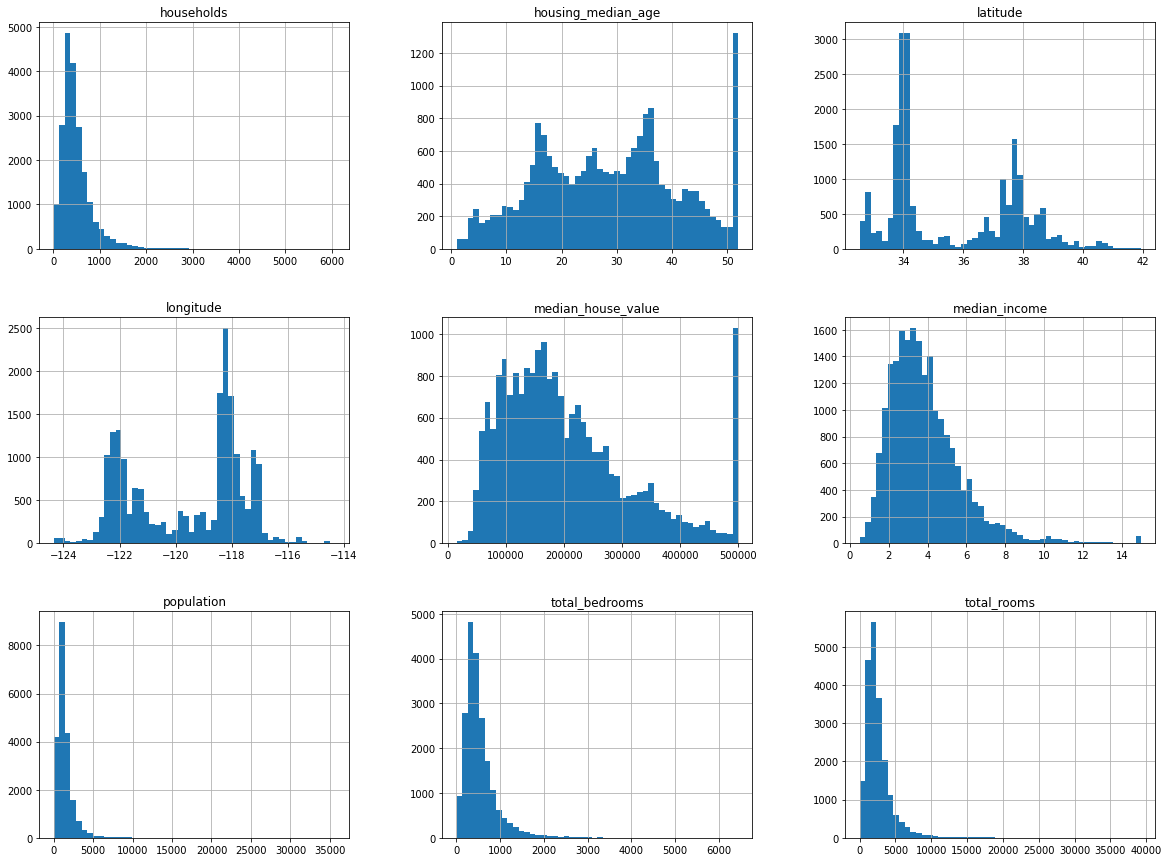

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Checking data for stratification, train_test split based on outcome

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3


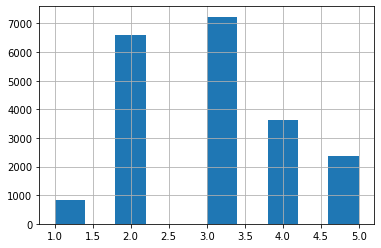

In [14]:
housing["income_cat"] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
housing.head()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))
housing["income_cat"].value_counts()/len(housing)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [16]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

In [17]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN
10970,-117.86,33.77,39,4159,655.0,1669,651,4.6111,240300,<1H OCEAN
20351,-119.05,34.21,27,4357,926.0,2110,876,3.0119,218200,<1H OCEAN
6568,-118.15,34.20,52,1786,306.0,1018,322,4.1518,182100,INLAND
13285,-117.68,34.07,32,1775,314.0,1067,302,4.0375,121300,INLAND


Visualizing and analysing the data

In [18]:
housing = strat_train_set.copy()

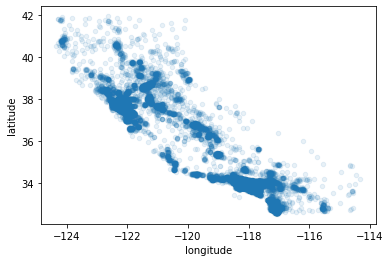

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

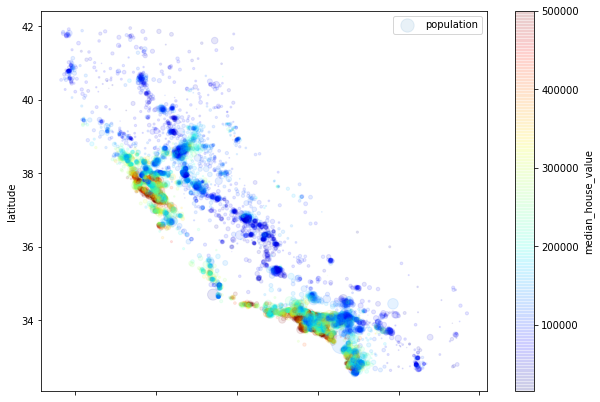

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [21]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False )

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0d5bb7f98>,
      dtype=object)

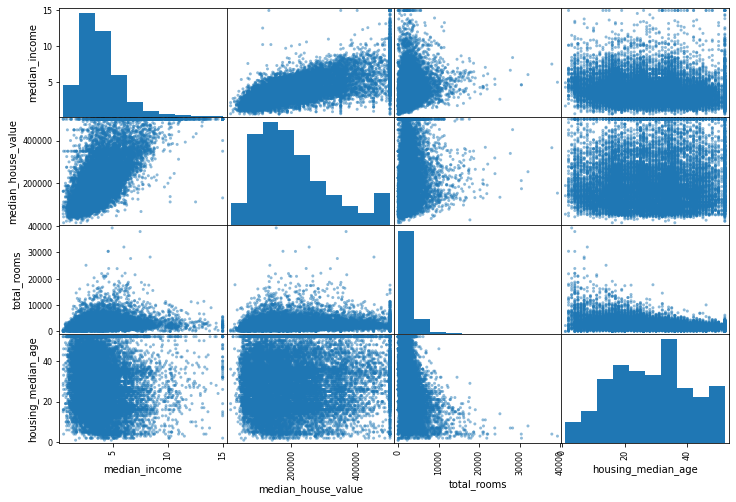

In [22]:
from pandas.plotting import scatter_matrix
atttributes = ['median_income','median_house_value',
               'total_rooms','housing_median_age']
scatter_matrix(housing[atttributes], figsize=(12,8))

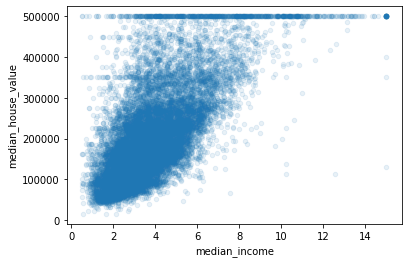

In [23]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [24]:
housing.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [32]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing['total_bedrooms'] / housing['total_rooms']
housing["population_per_household"] = housing['population'] / housing['households']

In [35]:
housing.drop('rooms_per_households', axis=1, inplace=True)
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [37]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB
